<a href="https://colab.research.google.com/drive/1jhStQXzYst1PWri92rgpKYwUoE9DFJRb#scrollTo=8AFuF0t4W5ZB" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotando um Scatter Plot com brasão dos times BR 23 - 7ª Rodada

 Vamos criar um gráfico de dispersão dos times xG(Expected Goals) e xGA(Expected Goals Against), mas com os logotipos dos clubes representando cada um.

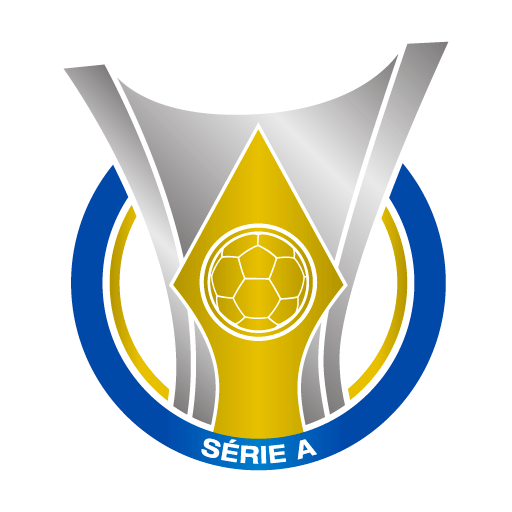

In [1]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Conectando o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lendo o arquivo csv
df = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/scatter_plot/7a rodada.csv', sep=';')
df.head()

,Cl,Equipe,xG,xGA
0,1,Botafogo,10.5,9.6
1,2,Palmeiras,12.6,5.2
2,3,Fluminense,10.2,12.4
3,4,Atlético Mineiro,11.2,6.5
4,5,Cruzeiro,11.6,8.9


In [4]:
#Criando a coluna com o nome do brasão
df['path'] = df['Equipe'] + '.png'
df

,Cl,Equipe,xG,xGA,path
0,1,Botafogo,10.5,9.6,Botafogo.png
1,2,Palmeiras,12.6,5.2,Palmeiras.png
2,3,Fluminense,10.2,12.4,Fluminense.png
3,4,Atlético Mineiro,11.2,6.5,Atlético Mineiro.png
4,5,Cruzeiro,11.6,8.9,Cruzeiro.png
5,6,Flamengo,13.1,7.3,Flamengo.png
6,7,Athletico,8.4,8.1,Athletico.png
7,8,São Paulo,10.7,7.7,São Paulo.png
8,9,Santos,8.0,9.3,Santos.png
9,10,Gremio,8.0,11.6,Gremio.png


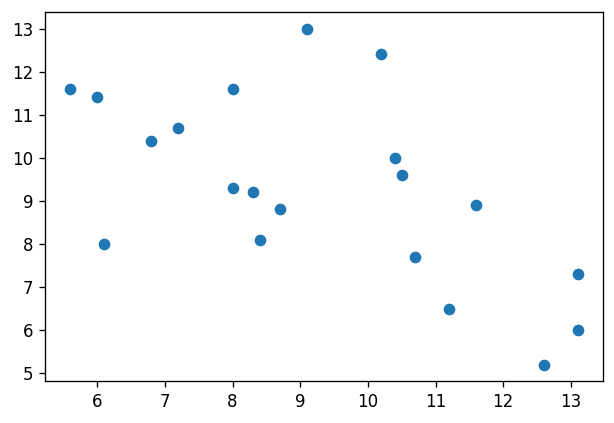

In [5]:
#Plotar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'])

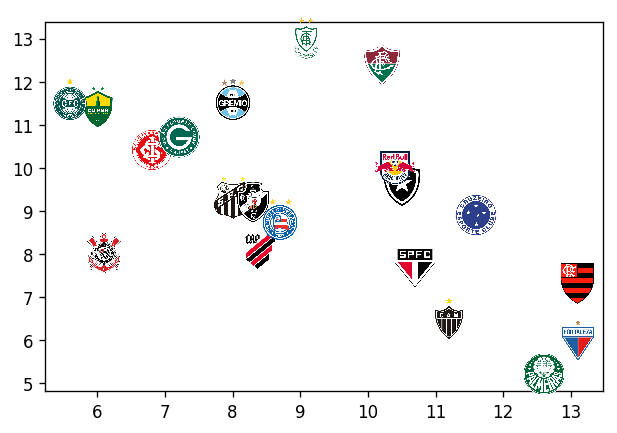

In [6]:
#Adcionando os brasões ao ploter
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'], color='white')
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

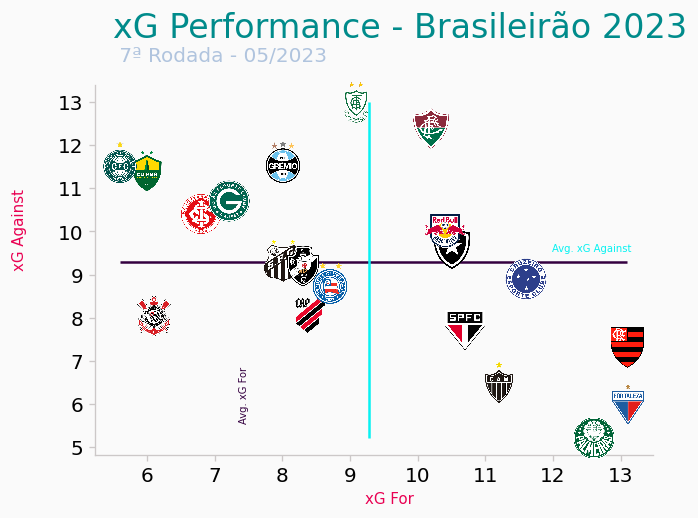

In [8]:
#Personalizando o gráfico
# Definir fonte e cor de fundo
plt.rcParams.update({'font.monospace':'Courier'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['xGA'].mean(), df['xG'].min(), df['xG'].max(), color='#340040')
plt.vlines(df['xG'].mean(), df['xGA'].min(), df['xGA'].max(), color='#07F2F2')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance - Brasileirão 2023' ,size=20, color='#008B8B')
fig.text(.15,.93,' 7ª Rodada - 05/2023', size=12, color='#B0C4DE')

## Avg line explanation
fig.text(.01,.50,'xG Against', size=9, color='#e90052',rotation=90)
fig.text(.50,0.01,'xG For', size=9, color='#e90052')

## Axes titles
fig.text(.76,.535,'Avg. xG Against', size=6, color='#07F2F2')
fig.text(.325,.18,'Avg. xG For', size=6, color='#340040',rotation=90)

## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

# Análise 

Na 7ª Rodada o Palmeiras de Abel Braga continua muito sólido, o Galo, Flamengo e o Fortaleza seguem com suas médias muito boas. Vale uma menção horosa para o Fortaleza, além do baixo investimento em relação às potencias do momento, vale destacar que a distância geográfica interfere muito e mesmo assim, o time de
Vojvoda segue firme. O Flu continua com muitos sustos. 